## Experiment 4: Analysing Statistical Data using Python
## Nikita Chitre
## Roll No 4
## Batch A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification, make_regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

### Reading the data

In [ ]:
boston_dataset = load_boston()

In [ ]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [ ]:
df['Price'] = boston_dataset.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Description 



1.   ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
2.   INDUS: Proportion of non-retail business acres per town
3.   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX: Nitric oxide concentration (parts per 10 million)
5. RM: Average number of rooms per dwelling
6. AGE: Proportion of owner-occupied units built prior to 1940
7. DIS: Weighted distances to five Boston employment centers
8. RAD: Index of accessibility to radial highways
9. TAX: Full-value property tax rate per \$10,000
10. PTRATIO: Pupil-teacher ratio by town
11. B: 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent  by town
12. LSTAT: Percentage of lower status of the population
13. CRIM: Per capita crime rate by town
14. Price: Median value of owner-occupied homes in $1000s



In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Here we can see that the  dataset has no NULL vaues

### Getting the Count, Mean, STD, min and max

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see that each feature has 560 rows.  Feature  CHAS has mean close to zero, Also, features NOX and CHAS has Standard Deviation close to zero which means the data points are close to the mean. Feature CHAS has values in the range of 0 and 1. 

#### Median

In [ ]:
df.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
Price       21.20000
dtype: float64

Here the features ZN, CHAS have median Zero, which means when data is sorted, zero is the number that occurs at the center. 

### Variance

In [ ]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
Price         84.586724
dtype: float64

Feature NOX has lowest variance which means data is less spreaded and feature TAX has the highest variance indicated that data is very spreaded. 

### Skewness

In [ ]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
Price      1.108098
dtype: float64

Skewness means the level of asymmetry of the probability distribution of a random variable about its mean. It tells the amount and direction of skew (departure from horizontal symmetry). 


Here CRIM feature has maximum skew and it is positive which refers to a longer or fatter tail on the right as seen in the below histogram

#### Distribution of CRIM Feature

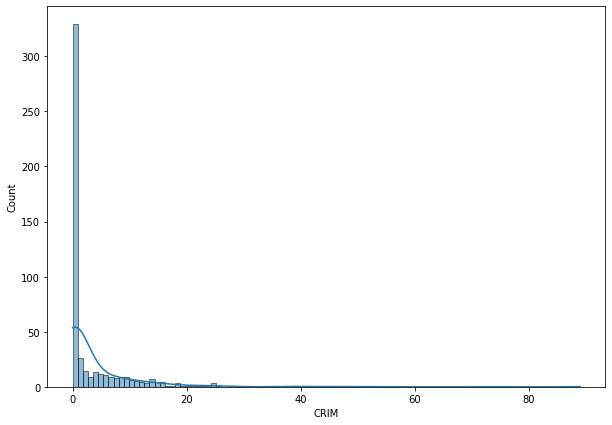

In [ ]:
_ = plt.figure(figsize=(10,7))
_ = sns.histplot(data = df, x='CRIM', kde =True)

### Feature LSTAT is Moderately Skewed 

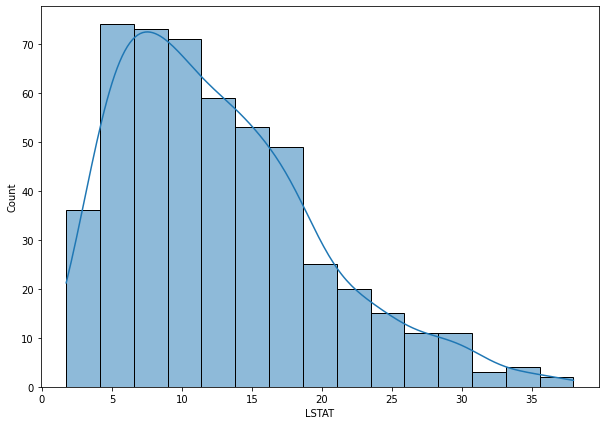

In [ ]:
_ = plt.figure(figsize=(10,7))
_ = sns.histplot(data = df, x='LSTAT', kde =True)

#### Feature INDUS has Less Skew but considerable Variance

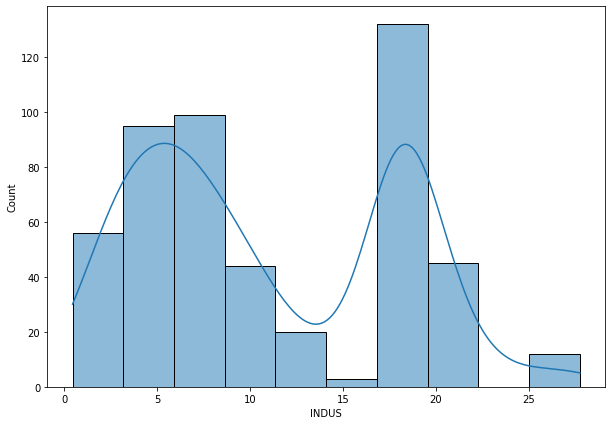

In [ ]:
_ = plt.figure(figsize=(10,7))
_ = sns.histplot(data = df, x='INDUS', kde =True)

From above histogram we can see that data is not lopsided towards one end, rather is in fairy distributed. 

### Correlation with Price Column

In [ ]:
df.corr()['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

Feature RM has highest positive correlation with Price variable whereas LSTAT has highest negative correlation with Price variable

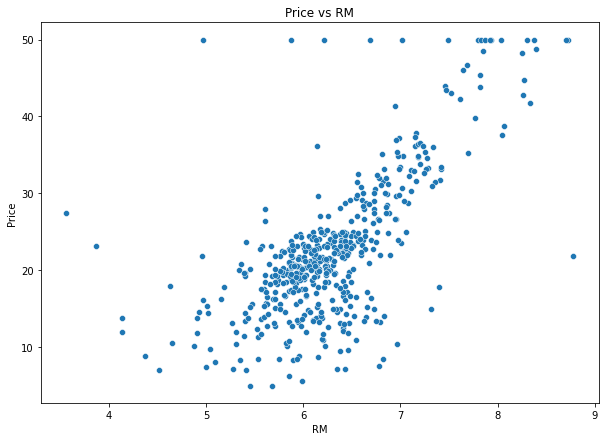

In [ ]:
_ = plt.figure(figsize=(10,7))
_ = sns.scatterplot(data = df, x='RM', y='Price')
_ = plt.title('Price vs RM')

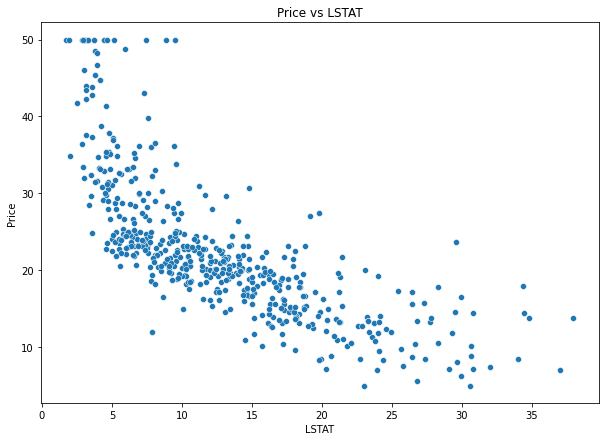

In [ ]:
_ = plt.figure(figsize=(10,7))
_ = sns.scatterplot(data = df, x='LSTAT', y='Price')
_ = plt.title('Price vs LSTAT')

### Covariance

In [ ]:
df.cov()['Price'].sort_values(ascending = False)

B          279.989834
Price       84.586724
ZN          77.315176
DIS          4.840229
RM           4.493446
CHAS         0.409409
NOX         -0.455412
PTRATIO    -10.110657
INDUS      -30.520823
RAD        -30.561228
CRIM       -30.718508
LSTAT      -48.447538
AGE        -97.589017
TAX       -726.255716
Name: Price, dtype: float64

Features Price and B have high covarriance meaning they vary together. 

### Quantiles

In [ ]:
df.quantile([.1, .25, .5, .75], axis = 0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0.10,0.038195,0.0,2.91,0.0,0.427,5.5935,26.950,1.628300,3.0,233.0,14.75,290.2700,4.680,12.750
0.25,0.082045,0.0,5.19,0.0,0.449,5.8855,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025
0.50,0.256510,0.0,9.69,0.0,0.538,6.2085,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200
0.75,3.677083,12.5,18.10,0.0,0.624,6.6235,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000


Feature CHAS has all quantile value of Zero. Let's check the value count of this feature.

In [ ]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Here we can see that feature CHAS is actually a discrete feature with only two values 0 and 1. 

### Regression Line

#### Train Test split

In [ ]:
y = df["Price"] 
X = np.array(df['RM']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 53)

#### Model training

In [ ]:
linearRegr = LinearRegression()   

In [ ]:
linearRegr.fit(X_train, y_train)     

LinearRegression()

#### Plotting Regression line

In [ ]:
y_pred = linearRegr.predict(X_test)

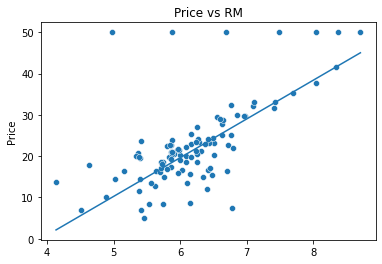

In [ ]:
_ = sns.scatterplot(x= X_test.flatten(), y = y_test)
_ = sns.lineplot(x=X_test.flatten(),y = y_pred)
_ = plt.title('Price vs RM')

Here we can see that Linear Regression does not fit this data extremely well 